# **Analyzing Customer Satisfaction: A Sentiment Study of an Online Clothing Retailer**



- Step 1: Loading the customer reviews dataset
- Step 2: Clean and preprocess the reviews
- Step 3: Tokenize the reviews and removing the stop words
- Step 4: Exploring the tokens and product categories
- Step 5: Extracting the adjectives in the reviews
- Step 6: Finding the sentiment of each review


In [1]:
import pandas as pd
import string

# Importing Natural Language Processing toolkit
import nltk

# Downloading the NLTK english stop words
nltk.download('stopwords')

# Downloading the NLTK sentence tokenizer
nltk.download('punkt')

# Downloading the NLTK POS Tagger
nltk.download('averaged_perceptron_tagger')

# Downloading the NLTK Vader Lexicon
nltk.download('vader_lexicon')

# Importing the NLTK english stop words
from nltk.corpus import stopwords

# Importing frequency distribution from NLTK
from nltk.probability import FreqDist

# Importing VADER dictionary. It is a rule-based sentiment analyzer
from nltk.sentiment import SentimentIntensityAnalyzer

# Importing data visualization modules
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


## **Loading the Customer reviews dataset**

In [2]:
# importing the dataset
df = pd.read_csv('/content/dataset.csv')
df.head()

,product_review,product_category
0,"I love, love, love this jumpsuit. it's fun, fl...",Bottoms
1,Beautifully made pants and on trend with the f...,Bottoms
2,I never would have given these pants a second ...,Bottoms
3,These pants are even better in person. the onl...,Bottoms
4,The silhouette and length of this skirt and le...,Bottoms


In [3]:
# check how many reviews have in our dataset
df.shape

(3376, 2)

In [4]:
# see the first product review
df.product_review[0]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [5]:
#check for missing values
df.isnull().sum()

product_review      0
product_category    0
dtype: int64

In [6]:
# check the number of reviews per product category
df.product_category.value_counts()

Bottoms     685
Dresses     681
Tops        680
Jackets     680
Intimate    650
Name: product_category, dtype: int64

## **Clean and preprocess the reviews**

- **Lower casing** - This prevents the model from treating the same word differently based on its case.

- **Removing the punctuations** - Helps the model focus on the semantics of the words themselves rather than on non-semantic symbols. And also, Removing punctuation can help the model generalize better to unseen data. By focusing on the core textual content and removing noise introduced by punctuation, the model can learn more robust patterns that are applicable across different texts.

In [7]:
# lower casing the reviews
df.product_review = df.product_review.str.lower()

# remove punctuations
df.product_review = df.product_review.str.translate(str.maketrans('','',string.punctuation))
df.head()

,product_review,product_category
0,i love love love this jumpsuit its fun flirty ...,Bottoms
1,beautifully made pants and on trend with the f...,Bottoms
2,i never would have given these pants a second ...,Bottoms
3,these pants are even better in person the only...,Bottoms
4,the silhouette and length of this skirt and le...,Bottoms


## **Tokenize the reviews and removing the stop words**
---
- <b>Tokenization</b> is the process of breaking down a continuous stream of text, such as a sentence or a paragraph, into smaller units called tokens. These tokens typically correspond to words, but can also represent subword units like prefixes, suffixes, and stems.

- <b>Tokenization</b> facilitates the transformation of text into a format that machine learning algorithms can understand.

In [8]:
# tokenize the all reviews
df['product_review_tokenized'] = df.product_review.apply(nltk.word_tokenize)

In [9]:
# remove stopwords
english_stopwords = stopwords.words('english')

def remove_stopwords(tokens):
  return [t for t in tokens if t not in english_stopwords]

df['cleaned_tockens'] = df.product_review_tokenized.apply(remove_stopwords)

df.head()

,product_review,product_category,product_review_tokenized,cleaned_tockens
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering..."


In [10]:
# recreate reviews with cleaned tokens
df['product_review_cleaned'] = df.cleaned_tockens.apply(lambda x: ' '.join(x))
df.head()

,product_review,product_category,product_review_tokenized,cleaned_tockens,product_review_cleaned
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...


## **Exploring the tokens and product categories**

In [11]:
# view the value counts of product categories
df.product_category.value_counts()

Bottoms     685
Dresses     681
Tops        680
Jackets     680
Intimate    650
Name: product_category, dtype: int64

In [12]:
# total number of tokens for "Tops" category
tops_tokens = []

for x in df[df.product_category == 'Tops'].cleaned_tockens:
  tops_tokens.extend(x)

len(tops_tokens)

18527

In [13]:
# view the most common 20 tokens for "Tops" category
freq_dist_tops = FreqDist(tops_tokens)
freq_dist_tops.most_common(20)

[('love', 337),
 ('top', 334),
 ('wear', 233),
 ('great', 229),
 ('size', 211),
 ('color', 185),
 ('shirt', 172),
 ('fit', 167),
 ('im', 149),
 ('perfect', 146),
 ('small', 141),
 ('like', 140),
 ('soft', 136),
 ('flattering', 128),
 ('little', 120),
 ('one', 119),
 ('sweater', 118),
 ('fits', 112),
 ('bought', 111),
 ('well', 109)]

In [14]:
# view the most common 20 tokens for "Bottoms" category
bottoms_tokens = []

for x in df[df.product_category == "Bottoms"].cleaned_tockens:
  bottoms_tokens.extend(x)

freq_dist_bottoms = FreqDist(bottoms_tokens)
freq_dist_bottoms.most_common(20)

[('fit', 371),
 ('size', 340),
 ('love', 324),
 ('great', 247),
 ('skirt', 235),
 ('wear', 225),
 ('pants', 218),
 ('perfect', 197),
 ('im', 195),
 ('like', 192),
 ('jeans', 182),
 ('look', 160),
 ('comfortable', 158),
 ('color', 154),
 ('waist', 125),
 ('pair', 117),
 ('nice', 115),
 ('flattering', 113),
 ('really', 111),
 ('little', 108)]

### **Extracting the adjectives used in the reviews**

In [15]:
nltk.download('tagsets')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


In [16]:
# Let's use the POS-tagger to assign part of speech to all the tokens of all of the reviews
df['POS_tokens'] = df.product_review_tokenized.apply(nltk.pos_tag)
df.head()

,product_review,product_category,product_review_tokenized,cleaned_tockens,product_review_cleaned,POS_tokens
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,"[(i, NN), (love, VBP), (love, NN), (love, NN),..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng..."


In [17]:
# extract the adjectives used in each review
def extract_adj(tokens):
  adjectives=[]
  for x in tokens:
    if x[1] in ['JJ', 'JJR', 'JJS']:
      adjectives.append(x[0])
  return adjectives

df['adjectives'] = df.POS_tokens.apply(extract_adj)
df.head()

,product_review,product_category,product_review_tokenized,cleaned_tockens,product_review_cleaned,POS_tokens,adjectives
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,"[(i, NN), (love, VBP), (love, NN), (love, NN),...","[fabulous, i, great]"
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),...","[flared, much]"
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)...","[second, much, cuter, right, small, loose, navy]"
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,...","[only, dry]"
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng...","[classic, comfortable, favorite, different, hi..."


In [18]:
# combine all the adjectives for the Tops as a single string
adj_tops = ""

for x in df[df.product_category == 'Tops'].adjectives:
  adj_tops += " ".join(x) + " "
adj_tops

'flattering due adjustable perfect cardigan last i pale gorgeous little hte ejans i glad i white crisp clean i great perfect wear cant wrong wasnt seethrough white careful i great comfy classic quirky beautiful practical cropped boxy perfect longer camisole little thin small gorgeous unsnapped skinny true great casual flare grey back nice beautiful ordinary usual tight chest i cute plaid great local comfortable bad little dressier small black top comfortable comfortable good perfect roomy warm cute collar beautiful unique busty top small wouldve fit better adorable bib favorite small perfect soft comfortable unusual asymmetrical front visual little ive adorable i comfortable feminine great dark perfect wish happy comfortable flattering comfortable light top lovely floral great white top happy top online little i little large petite longer regular perfect give soft comfortable short much uncomfortable doesnt easier navy boxy whole cute more fabric i super read same specific petite weigh

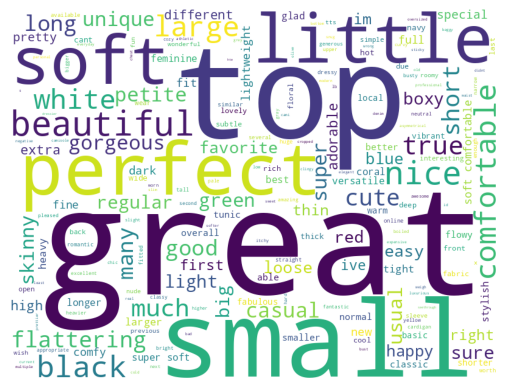

In [19]:
# visualize the adjectives using a wordcloud
word_cloud = WordCloud(width=800, height=608, background_color='white')
word_cloud.generate(adj_tops)

# Display the word cloud
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

## **Finding the sentiment of each review**

### Sentiment scores:

- `pos`: The probability of `positive` sentiment
- `neu`: The probability of `neutral` sentiment
- `neg`: The probability of `negative` sentiment
- `compound`: The normalized `compound` score that takes values from -1 to 1

We can use the `compound` score to find the sentiment of each review.

- if compound score>=0.05 then `positive`
- if compound score between -0.05 and 0.05 then `neutral`
- if compound score<=-0.05 then `negative`


Now let's create a method to find the sentiment of a review using the compound score

In [20]:
def polarity_score(review):
    # Initilizing the Sentiment Analyzer
    sent = SentimentIntensityAnalyzer()

    # Extracting the sentiment polarity scores of a review
    scores = sent.polarity_scores(review)

    # Getting the compound score
    compound = scores['compound']

    if compound > 0.05:
        return "positive"
    elif compound < -0.5:
        return "negative"
    else:
        return "neutral"

    polarity_score('This product is amazing, the quality is really good')

In [21]:
df['sentiment'] = df.product_review_cleaned.apply(polarity_score)
df.head()

,product_review,product_category,product_review_tokenized,cleaned_tockens,product_review_cleaned,POS_tokens,adjectives,sentiment
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,"[(i, NN), (love, VBP), (love, NN), (love, NN),...","[fabulous, i, great]",positive
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),...","[flared, much]",positive
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)...","[second, much, cuter, right, small, loose, navy]",positive
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,...","[only, dry]",positive
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng...","[classic, comfortable, favorite, different, hi...",positive


In [22]:
df_sentiment = df.groupby(['product_category', 'sentiment']).size().reset_index(name = 'counts')
df_sentiment

,product_category,sentiment,counts
0,Bottoms,negative,3
1,Bottoms,neutral,5
2,Bottoms,positive,677
3,Dresses,negative,36
4,Dresses,neutral,82
5,Dresses,positive,563
6,Intimate,negative,5
7,Intimate,neutral,35
8,Intimate,positive,610
9,Jackets,negative,2


## **Key Findings**


*   The "Bottoms" category is the most popular among customers, with the highest number of reviews compared to other categories.

*   Bottoms also received the most positive reviews. This suggests that customers are highly satisfied with the products in the "Tops" category.

*   Negative sentiment is relatively low across all product categories. This indicates that overall, customers have a positive sentiment towards the products across all categories. It reflects well on the product quality and customer satisfaction.

*   However, Dresses received predominantly positive feedback. However, it also received relatively more negative feedback compared to other categories. This suggests that while customers generally like Dresses, there may be some areas for improvement or issues that need to be addressed.



